(time)=
# Time interval and resolution


To define optimization problems in SHOP, the following is mandatory:
- Define a time inverval - when is the start and stop for the optimization.
- Define a time resolution - what is the lenght of the discrete time steps.

But to do that, we first need to create an instance of SHOP. Execute the code below:

In [8]:
from corrector.time import *
from pyshop import ShopSession
shop = ShopSession()

The first line tells Python to import from a package named `pyshop` which is our SHOP wrapper. `ShopSession` is the name of the class we use for running SHOP. In the next line, we invoke the function (by adding the parantheses) and assign the instance to a variable we have named `shop`. All further interaction with SHOP will be using this variable.

## Setting time inverval
pySHOP uses the `pandas.Timestamp` object for setting the start- and endtime and for timeseries index. Execute the code below to import the `pandas` package which we will refer to as pd in the code for convenience. The code also assigns a timestamp to the `starttime` variable.

In [9]:
import pandas as pd
starttime = pd.Timestamp('2022-01-01')


### Exercise
Complete the code below by replacing the `***`:
- create a new `Timestamp` named `endtime` 2 days later than `starttime`.
- fill in the missing argument to `set_time_resolution`.
- execute the code.

In [10]:
endtime = pd.Timestamp('2022-01-03')
shop.set_time_resolution(starttime=starttime, endtime=endtime, timeunit='hour')

check_time_resolution1(shop)

Button(description='Check answer', style=ButtonStyle(), tooltip='Check answer')

Output()

The `set_time_resolution` function is a member function of our `ShopSession` object named `shop` and takes 3 madatory arguments: starttime, endtime and timeunit. The two first argument must be a `pd.Timestamp` object, and the timeunit a string with the value `hour`, `minute` or `second`. The above setting means we are using hourly time resolution. We will now verify that the time has been set correctly using the `get_time_resolution` function which returns a dictionary with the respective parameters.

In [11]:
time = shop.get_time_resolution()
time

{'starttime': Timestamp('2022-01-01 00:00:00'),
 'endtime': Timestamp('2022-01-03 00:00:00'),
 'timeunit': 'hour',
 'timeresolution': 2022-01-01    1.0
 Name: data, dtype: float64}

Note that the returned dict also has a field called `timeresolution` which represents the step length from the given time and onwards. In our case, we have hourly timesteps for the whole period. Execute the code below to investigate the `timeresolution` further:

In [12]:
type(time['timeresolution'])

pandas.core.series.Series

The `timeresolution` is an object of type `Series` from the pandas package, in other words a time series where the index is given by `Timestamp` objects. We want to set 15 minutes time resolution for the first 24 hours and hourly thereafter. An alternative `timeresolution` is defined below:

In [13]:
timeresolution = pd.Series(
    data = [15, 60],
    index = [starttime, starttime+pd.Timedelta(hours=24)]
)
timeresolution

2022-01-01    15
2022-01-02    60
dtype: int64

The new timeseries has the value 15 from the starttime, meaning that the step length is 15 minutes, and then changes to 60 after 24 hours.

### Exercise
Complete the code below:
- Insert our new `timeresolution` variable as the fourth argument to the `set_time_resolution` function.
- Change time unit to `minute`.
- Print the output from `get_time_resolution` to verify that all values have been set correctly.

In [16]:
shop.set_time_resolution(starttime=starttime, endtime=endtime, timeunit='minute', timeresolution=timeresolution)
print(shop.get_time_resolution())

check_time_resolution2(shop)

{'starttime': Timestamp('2022-01-01 00:00:00'), 'endtime': Timestamp('2022-01-03 00:00:00'), 'timeunit': 'minute', 'timeresolution': 2022-01-01 00:00:00    15.0
2022-01-01 00:15:00    15.0
2022-01-01 00:30:00    15.0
2022-01-01 00:45:00    15.0
2022-01-01 01:00:00    15.0
                       ... 
2022-01-02 20:00:00    60.0
2022-01-02 21:00:00    60.0
2022-01-02 22:00:00    60.0
2022-01-02 23:00:00    60.0
2022-01-03 00:00:00    60.0
Name: data, Length: 121, dtype: float64}


Button(description='Check answer', style=ButtonStyle(), tooltip='Check answer')

Output()

The timeresolution retuned by SHOP is not identical with what we entered, and the whole timeseries can not be displayed in our view. The `Series` object has a convenient built-in plotting function we can use to visualize the output. Execute the code below to plot the output:

<AxesSubplot:>

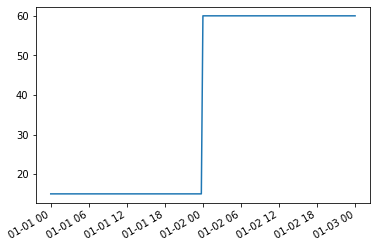

In [17]:
shop.get_time_resolution()['timeresolution'].plot()

Here we clearly see that the value is 15 the first 24 hours and 60 thereafter. Timeseries with missing points are by default interpolated and extrapolated with so-called forward fill. The returned time series has been extended with all the points reflecting the current time resolution of SHOP.